<a href="https://colab.research.google.com/github/kanagashanmugamp/210701103-CS19P18-Deep-Learning-Concepts/blob/main/210701103_DLC_EXP_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **`Importing Libraries and Packages`**

In [16]:
#import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,Reshape, LeakyReLU as LR,Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

### **Importing Data**

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

### **Check For Successful Import of Data**

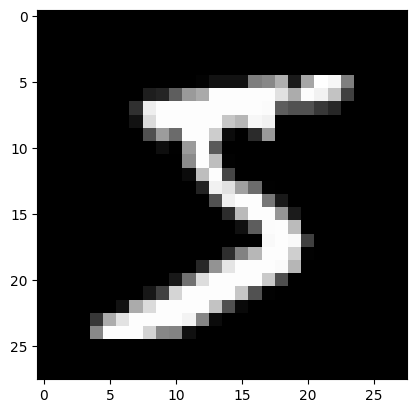

In [18]:
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [19]:
LATENT_SIZE = 32

### **Creation of Encoder**

In [23]:
encoder = Sequential([
          Flatten(input_shape = (28, 28)),
          Dense(512),
          LR(),
          Dropout(0.5),
          Dense(256),
          LR(),
          Dropout(0.5),
          Dense(128),
          LR(),
          Dropout(0.5),
          Dense(64),
          LR(),
          Dropout(0.5),
          Dense(LATENT_SIZE),
          LR()
])

### **Creation of Decoder**

In [24]:
decoder = Sequential([
          Dense(64, input_shape = (LATENT_SIZE,)),
          LR(),
          Dropout(0.5),
          Dense(128),
          LR(),
          Dropout(0.5),
          Dense(256),
          LR(),
          Dropout(0.5),
          Dense(512),
          LR(),
          Dropout(0.5),
          Dense(784),
          Activation("sigmoid"),
          Reshape((28, 28))
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

### **Training the Model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


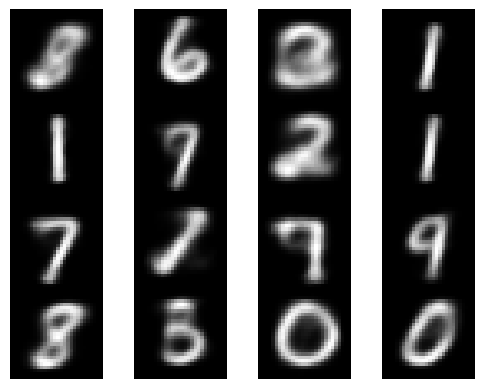

----------- EPOCH 14 -----------
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.1906


In [28]:
EPOCHS=15
for epoch in range(EPOCHS):
      fig, axs = plt.subplots(4, 4)
      rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
      display.clear_output() # If you imported display from IPython
      for i in range(4):
        for j in range(4):
          axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
          axs[i, j].axis("off")
      plt.subplots_adjust(wspace = 0, hspace = 0)
      plt.show()
      print("-----------", "EPOCH", epoch, "-----------")
      model.fit(x_train, x_train)